### mlp models for fitting math functions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from cntk.layers import Dense
from cntk.models import Sequential
import cntk.ops as C
from cntk.ops import element_times, constant
from cntk.io import MinibatchSource, CTFDeserializer, StreamDef, StreamDefs, INFINITELY_REPEAT
from cntk.learner import sgd
from cntk import Trainer

import sys
from getpass import getuser
sys.path.append('/home/'+getuser()+'/git_test')
from Teemo.algorithm.utils import matrixops


In [5]:
## generate sin function data
def sin(n_trn=1000, n_valid=100):
    noise_r = 0.0001
    rng = np.random.RandomState()
    trn_x = rng.uniform(-1., 1., size=(n_trn, 1)).astype(np.float32)
    trn_y = np.sin(trn_x * np.pi)
    valid_x = rng.uniform(-1., 1., size=(n_valid, 1)).astype(np.float32)
    valid_y = np.sin(valid_x * np.pi) 
    return trn_x, trn_y, valid_x, valid_y

## generate H step function data
def Hstep(n_trn=1000, n_valid=100):
    rng = np.random.RandomState()
    trn_x = rng.uniform(-1., 1., size=(n_trn, 1)).astype(np.float32)
    zero = np.zeros_like(trn_x)
    one = np.ones_like(trn_x)
    trn_y = np.where(trn_x > zero, one, zero)

    valid_x = rng.uniform(-1., 1., size=(n_valid, 1)).astype(np.float32)
    zero = np.zeros_like(valid_x)
    one = np.ones_like(valid_x)
    valid_y = np.where(valid_x > zero, one, zero)

    return trn_x, trn_y, valid_x, valid_y


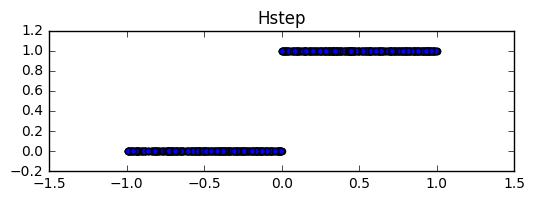

In [6]:
trn_x, trn_y, valid_x, valid_y = Hstep()
plt.figure()
plt.subplot(211)
plt.scatter(trn_x[:, 0], trn_y[:, 0])
plt.title('Hstep')

plt.show()

In [7]:
input_dim = 1
output_dim = 1

input = C.input_variable(input_dim, np.float32)
label = C.input_variable(output_dim, np.float32)
mlp = Sequential([Dense(3, activation=C.tanh),
                  Dense(output_dim, activation=C.sigmoid)])(input)

loss = C.squared_error(mlp, label)
error = C.squared_error(mlp, label)
trainer = Trainer(mlp, loss, error, [sgd(mlp.parameters, lr=0.005)])

In [8]:
epoches = 300
minibatch_size = 40
freq_epoch = epoches/10
loss_list = []
error_list = []
for ii in range(epoches):
    for mb_x, mb_y in matrixops.iterate_minibatches(minibatch_size, trn_x, trn_y, shuffle=True):
        trainer.train_minibatch({input: mb_x, label: mb_y})
    valid_loss = trainer.test_minibatch({input: valid_x, label: valid_y})
    loss_list.append(valid_loss)
    if ii % freq_epoch == 0:
        print ('epoch: {0}, loss: {1}'.format(ii, valid_loss))
    

epoch: 0, loss: 0.07851250648498535
epoch: 30, loss: 0.018948462009429932
epoch: 60, loss: 0.013278228044509888
epoch: 90, loss: 0.010697587728500366
epoch: 120, loss: 0.009068949222564697
epoch: 150, loss: 0.007928224802017212
epoch: 180, loss: 0.007168426513671875
epoch: 210, loss: 0.006580761671066284
epoch: 240, loss: 0.0060875904560089115
epoch: 270, loss: 0.005619064569473266


In [9]:
y_pred = mlp.eval({input: valid_x})[0]
print (y_pred.shape)

(100, 1)


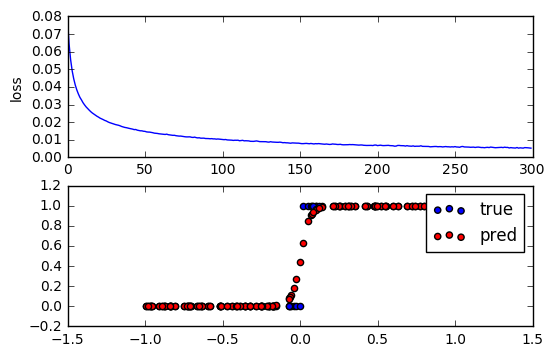

In [10]:
plt.figure()
plt.subplot(211)
plt.plot(loss_list)
plt.ylabel('loss')

plt.subplot(212)
plt.scatter(valid_x[:, 0], valid_y[:, 0], label='true', c='b')
plt.scatter(valid_x[:, 0], y_pred[:, 0], label='pred', c='r')
plt.legend()
plt.show()

In [11]:
mlp = Sequential([Dense(3, activation=C.tanh),
                  Dense(output_dim, activation=C.sigmoid)])(input)

loss = C.squared_error(mlp, label)
error = C.squared_error(mlp, label)
trainer = Trainer(mlp, loss, error, [sgd(mlp.parameters, lr=0.005)])

In [45]:
from cntk.utils import ProgressPrinter
from cntk.utils import get_train_loss
progress_printer = ProgressPrinter(tag='training')

epoches = 3
minibatch_size = 500
freq_epoch = epoches/10
loss_list = []
error_list = []
for ii in range(epoches):
    for mb_x, mb_y in matrixops.iterate_minibatches(minibatch_size, trn_x, trn_y, shuffle=True):
        trainer.train_minibatch({input: mb_x, label: mb_y})
        loss = get_train_loss(trainer)
        #print (trainer.previous_minibatch_loss_average, \
        #       trainer.previous_minibatch_sample_count, \
        #       trainer.previous_minibatch_evaluation_average)
        
        progress_printer.update_with_trainer(trainer)
    progress_printer.epoch_summary()

        
        

Finished Epoch [1]: [training] loss = 0.002058 * 1000
Finished Epoch [2]: [training] loss = 0.001934 * 1000
Finished Epoch [3]: [training] loss = 0.001907 * 1000
